## 컨투어 Conturs

* 특정 영역의 경계를 따라 같은 픽셀값을 갖는 지점을 연결하는 선이다.
* 대상의 외형을 파악하는데 유용
* 모양 분석이나 오브젝트 검출을 위한 전처리로 사용됨

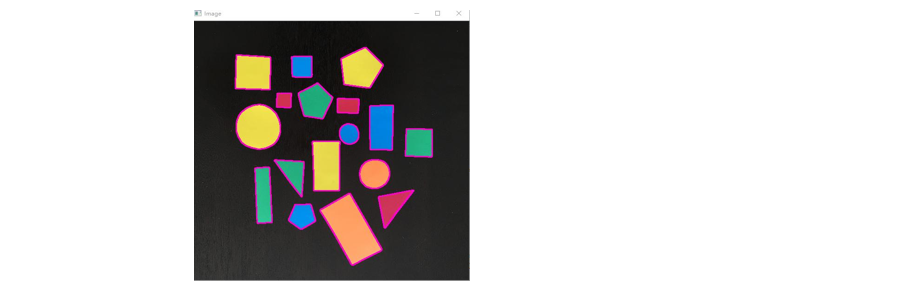

In [3]:
import cv2

img_color = cv2.imread('./image/test.jpg', cv2.IMREAD_COLOR)


#그레이 스케일로 변환 후, 이진화
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)


#이진화 개선위해 모폴로지 연산
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_binary = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)

#컨투어 검출
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


#모든 컨투어 그리기
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 3)  

cv2.imshow("result", img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 컨투어 중심점 찾기

> 모멘트(moment)는 물리학적으로는 물체의 질량 분포와 관련된 개념으로, 물체를 구성하는 각각의 물질 조각들의 위치와 질량에 대한 정보를 나타냅니다. 물체의 모멘트는 물체가 어떻게 움직이는지, 회전하는지 등의 특성을 설명하는 데 사용됩니다.


In [4]:
import cv2

img_color = cv2.imread('./image/test.jpg', cv2.IMREAD_COLOR)


#그레이 스케일로 변환 후, 이진화
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)


#이진화 개선위해 모폴로지 연산
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_binary = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)

#컨투어 검출
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


#모든 컨투어 그리기
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 3)  


for contour in contours:
    mu = cv2.moments(contour)

    ##### 모멘트에서 중심점을 구하는 공식임
    cx = int(mu['m10']/mu['m00'] + 1e-5)
    cy = int(mu['m01']/mu['m00'] + 1e-5)

    cv2.circle(img_color, (cx, cy), 15, (0,255,255), -1)

cv2.imshow("result", img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://docs.opencv.org/4.x/dd/d49/tutorial_py_contour_features.html

In [32]:
#윤곽선에서 모멘트 계산
cv2.moments(contour)

{'m00': 47240.5,
 'm10': 29312788.666666664,
 'm01': 12275788.0,
 'm20': 18425574928.916664,
 'm11': 7617067098.375,
 'm02': 3434973323.9166665,
 'm30': 11727157381199.3,
 'm21': 4787949464999.25,
 'm12': 2131356602462.5166,
 'm03': 1019929086778.5,
 'mu20': 236953313.63610077,
 'mu11': -74535.6213092804,
 'mu02': 245020401.7218547,
 'mu30': 5704859.537109375,
 'mu21': 22116396.570236206,
 'mu12': -9855399.603912354,
 'mu03': -14421958.303710938,
 'nu20': 0.10617782265618178,
 'nu11': -3.3399110818509205e-05,
 'nu02': 0.10979265224002296,
 'nu30': 1.1761392456896167e-05,
 'nu21': 4.559614800379498e-05,
 'nu12': -2.031833068056307e-05,
 'nu03': -2.9732951443162733e-05}

###  경계 사각형 Bounding Rectangle

* 경계 사각형을 구하는 방법은 2가지 있습니다.
1. boundingRect: 물체의 회전을 고려하지 않는 경계 사각형
2. minAreaRect: 물체의 회전을 고려하여 경계 사각형

In [1]:
import cv2
import numpy as np

img_color = cv2.imread('./image/test.jpg', cv2.IMREAD_COLOR)


#그레이 스케일로 변환 후, 이진화
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY_INV)


#이진화 개선위해 모폴로지 연산
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
img_binary = cv2.morphologyEx(img_binary, cv2.MORPH_CLOSE, kernel)

#컨투어 검출
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


#모든 컨투어 그리기
cv2.drawContours(img_color, contours, -1, (0, 255, 0), 3)  


for contour in contours:

    #물체의 회전을 고려하지 않고 경계 사가형을 구함
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (255, 0, 0), 3)


    #물체의 회전을 고려하여 경계 사가형을 구함
    rect = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(img_color, [box], 0, (255, 0, 255), 3)

cv2.imshow("result", img_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\miran\AppData\Local\Temp\ipykernel_11156\3453514729.py:34: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)
